In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import * #ggplot, aes, geom_line, theme, theme_light, element_text
import warnings; 
warnings.simplefilter('ignore')
%matplotlib inline

df = pd.read_csv("./data.csv")
df['dateRep'] = pd.to_datetime(df.dateRep, infer_datetime_format=True)

In [2]:
#find cumulative cases in each country by using groupby-apply
df['totalcases'] = df.groupby(['countriesAndTerritories'])['cases_weekly'].apply(lambda x: x.cumsum())
df['totaldeaths'] = df.groupby(['countriesAndTerritories'])['deaths_weekly'].apply(lambda x: x.cumsum())

In [3]:
df.head(100)

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days,totalcases,totaldeaths
0,2021-01-18,2021-02,557,45,Afghanistan,AF,AFG,38041757.0,Asia,3.24,557,45
1,2021-01-11,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15,1232,116
2,2021-01-04,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61,2134,176
3,2020-12-28,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19,4128,264
4,2020-12-21,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56,4868,375
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-04-13,2020-15,85,2,Albania,AL,ALB,2862427.0,Europe,8.17,67329,1256
96,2020-04-06,2020-14,149,11,Albania,AL,ALB,2862427.0,Europe,9.50,67478,1267
97,2020-03-30,2020-13,123,8,Albania,AL,ALB,2862427.0,Europe,5.94,67601,1275
98,2020-03-23,2020-12,47,1,Albania,AL,ALB,2862427.0,Europe,3.04,67648,1276


In [4]:
summary = df.groupby('countriesAndTerritories')\
            .agg({'deaths_weekly':np.sum,'cases_weekly':np.sum,'popData2019':np.mean})\
            .reset_index().sort_values('cases_weekly',ascending=False)
summary['ratio'] = summary.deaths_weekly/summary.cases_weekly

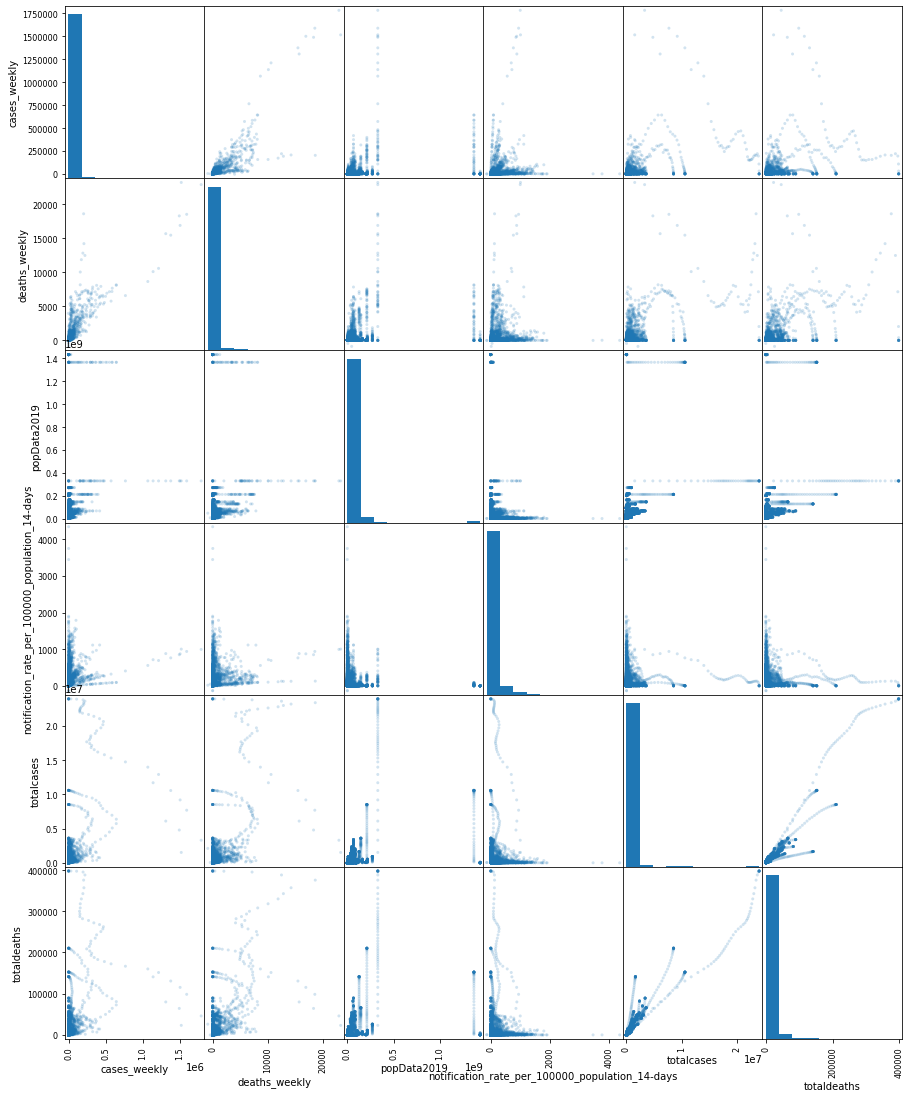

In [5]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,19))
plt.show()

In [6]:
df.dtypes

dateRep                                            datetime64[ns]
year_week                                                  object
cases_weekly                                                int64
deaths_weekly                                               int64
countriesAndTerritories                                    object
geoId                                                      object
countryterritoryCode                                       object
popData2019                                               float64
continentExp                                               object
notification_rate_per_100000_population_14-days           float64
totalcases                                                  int64
totaldeaths                                                 int64
dtype: object

In [7]:
df = pd.read_csv("./data.csv")
df['dateRep'] = pd.to_datetime(df.dateRep, infer_datetime_format=True)
df['totalcases'] = df.groupby(['countriesAndTerritories'])['cases_weekly'].apply(lambda x: x.cumsum())
df['totaldeaths'] = df.groupby(['countriesAndTerritories'])['deaths_weekly'].apply(lambda x: x.cumsum())

# Extract top 20 countries by number of cases
top_countries = df.groupby(['countriesAndTerritories'])['cases_weekly'].apply(lambda x : x.sum()) \
                  .sort_values(ascending = False) \
                  .reset_index()['countriesAndTerritories'].head(20)

df_top_countries = df[df['countriesAndTerritories'].isin(top_countries)]

### US weekly cases increasing:
We can see that US weekly cases are having an increasing trend compared to other countries.

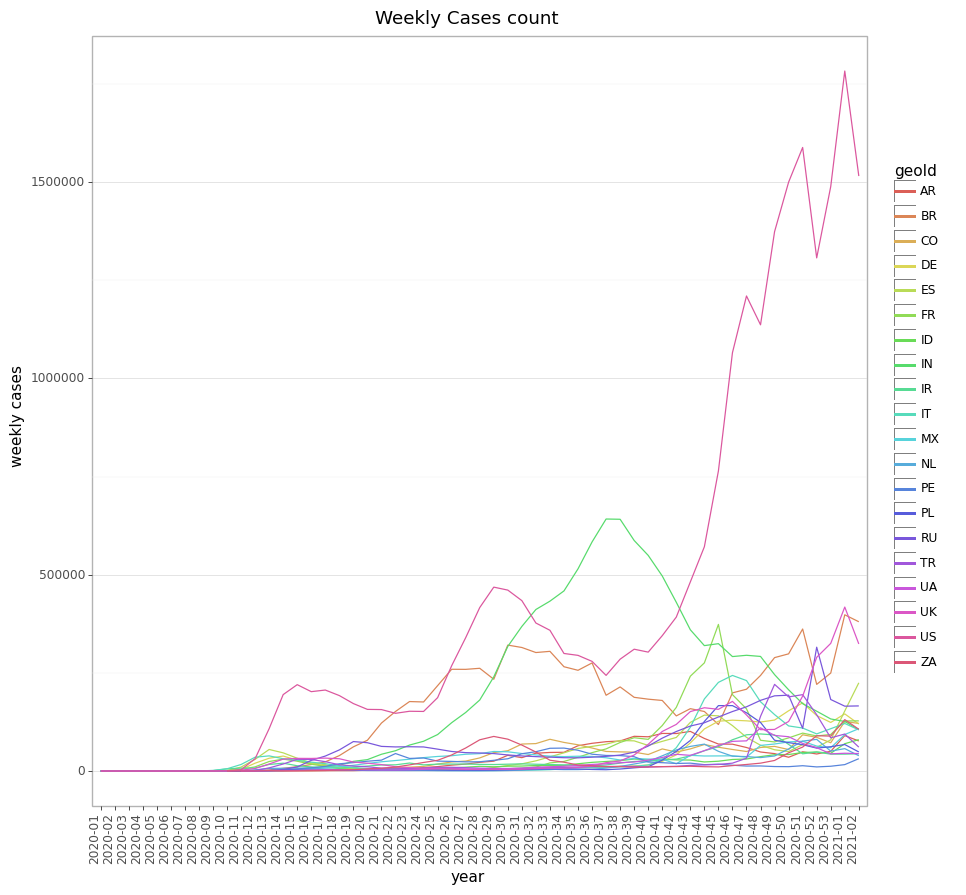

<ggplot: (8772258092975)>

In [8]:
(ggplot(df_top_countries)
+ geom_line(mapping = aes(x="year_week", y = "cases_weekly", group = 'geoId', color = 'geoId'))
+ theme_light()
+ xlab('year')
+ ylab('weekly cases')
+ ggtitle('Weekly Cases count') 
# + facet_wrap('geoId') 
# + geom_text(aes(x='year_week', y=('cases_weekly'), label = 'geoId', color = 'geoId')) 
# + theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=1), panel_spacing=0.5, figure_size=(10,10)))
+ theme(axis_text_x=element_text(angle = 90, vjust = 1, hjust=1), panel_grid_major_x=element_blank(), panel_spacing=0.5, figure_size=(10,10)))


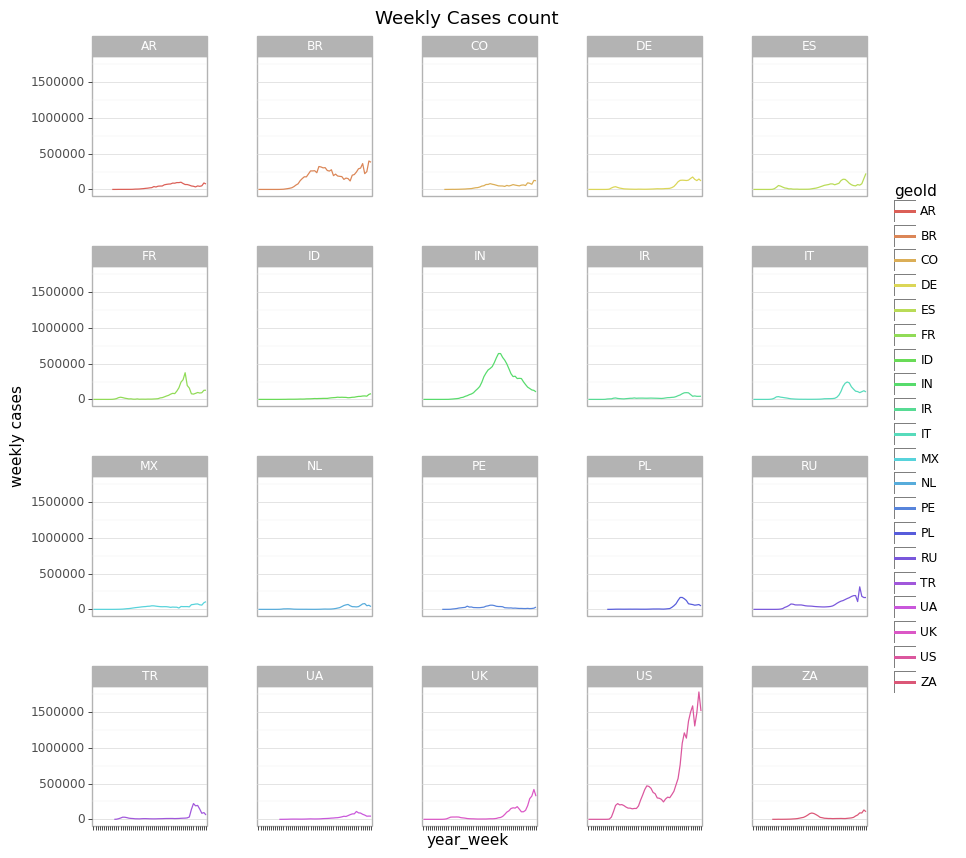

<ggplot: (8772227371846)>

In [9]:
(ggplot(df_top_countries)
+ geom_line(mapping = aes(x="year_week", y = "cases_weekly", group = 'geoId', color = 'geoId'))
+ theme_light()
+ ylab('weekly cases')
+ ggtitle('Weekly Cases count') 
+ facet_wrap('geoId') 
# + geom_text(aes(x='year_week', y=('cases_weekly'), label = 'geoId', color = 'geoId')) 
+ theme(axis_text_x=element_blank(), panel_grid_major_x=element_blank(), panel_spacing=0.5, figure_size=(10,10)))

In [10]:
summary = df.groupby('countriesAndTerritories')\
            .agg({'deaths_weekly':np.sum,'cases_weekly':np.sum,'popData2019':np.mean})\
            .reset_index().sort_values('cases_weekly',ascending=False)
summary['ratio'] = summary.deaths_weekly/summary.cases_weekly
summary['spreadRate'] = summary.cases_weekly/summary.popData2019

In [11]:
summary_top_countries = summary[summary['countriesAndTerritories'].isin(top_countries)]
summary_top_countries = summary_top_countries.sort_values(['ratio'], ascending = False).reset_index(drop=True)
summary_top_countries

,countriesAndTerritories,deaths_weekly,cases_weekly,popData2019,ratio,spreadRate
0,Mexico,141248,1649502,1.275755e+08,0.085631,0.012930
1,Iran,56803,1330411,8.291389e+07,0.042696,0.016046
2,Peru,38931,1068802,3.251046e+07,0.036425,0.032876
3,Italy,82177,2381277,6.035955e+07,0.034510,0.039452
4,Indonesia,25987,907929,2.706256e+08,0.028622,0.003355
5,South_Africa,37105,1337926,5.855827e+07,0.027733,0.022848
6,United_Kingdom,89261,3395959,6.664711e+07,0.026284,0.050954
7,Colombia,49004,1923132,5.033944e+07,0.025481,0.038203
8,Argentina,45832,1807396,4.478068e+07,0.025358,0.040361
9,Brazil,210299,8511770,2.110495e+08,0.024707,0.040331


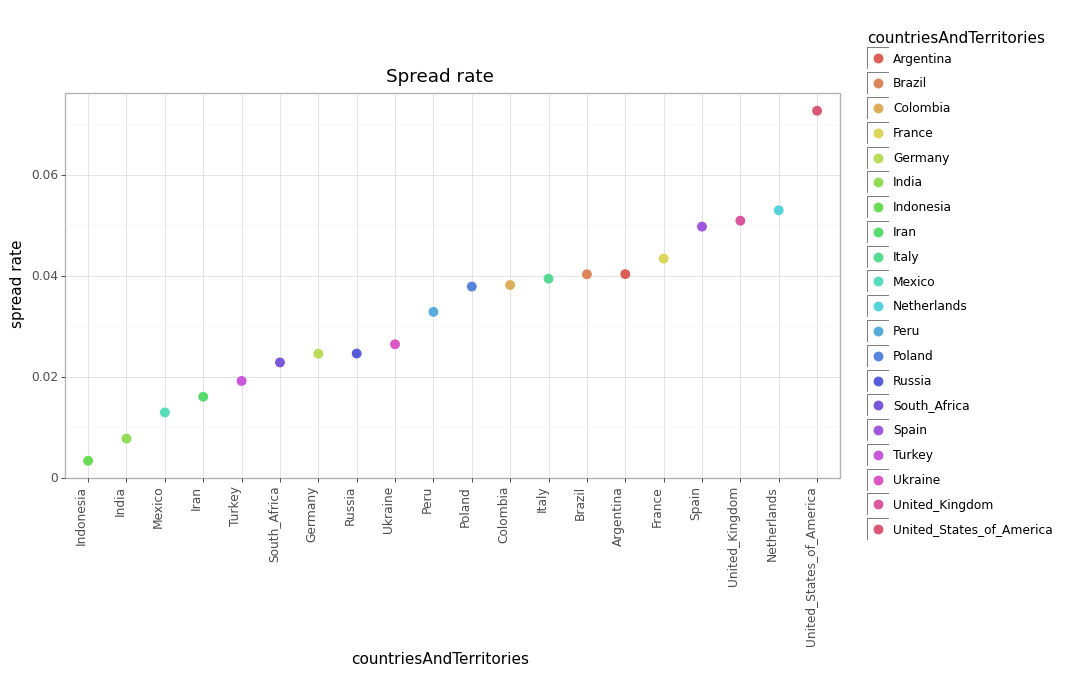

<ggplot: (8772227024851)>

In [12]:
top20 = summary_top_countries.sort_values(['spreadRate'], ascending = True).reset_index(drop=True)
countries = top20['countriesAndTerritories'].tolist()
country_cat = pd.Categorical(summary_top_countries['countriesAndTerritories'], categories=countries)
(ggplot(summary_top_countries)
+ geom_point(mapping = aes(x=country_cat , y = "spreadRate", color = 'countriesAndTerritories'), size = 3) 
+ theme_light()
+ xlab(u'countriesAndTerritories')
+ ylab(u'spread rate')
+ ggtitle(u'Spread rate') 
+ theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=1), panel_spacing=0.5, figure_size=(10,5)))

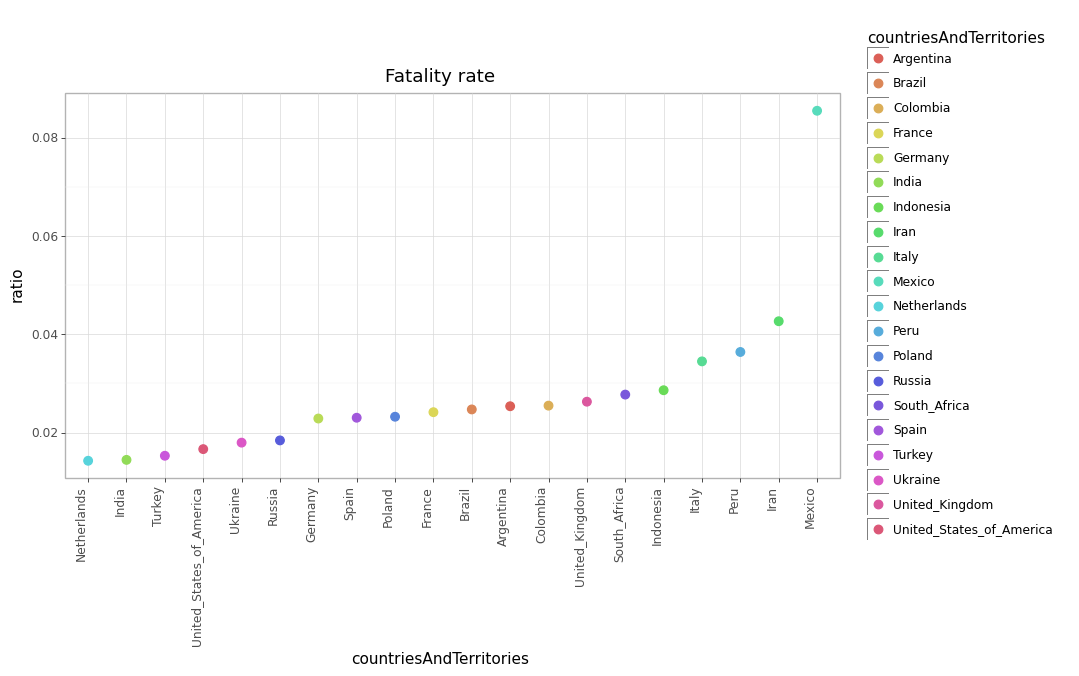

<ggplot: (8772227203003)>

In [13]:
top20 = summary_top_countries.sort_values(['ratio'], ascending = True).reset_index(drop=True)
countries = top20['countriesAndTerritories'].tolist()
country_cat = pd.Categorical(summary_top_countries['countriesAndTerritories'], categories=countries)

(ggplot(summary_top_countries)
+ geom_point(mapping = aes(x=country_cat , y = "ratio", color = 'countriesAndTerritories'), size = 3)
+ theme_light()
+ xlab(u'countriesAndTerritories')
+ ylab(u'ratio')
+ ggtitle(u'Fatality rate')  
+ theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=1), panel_spacing=0.5, figure_size=(10,5)))

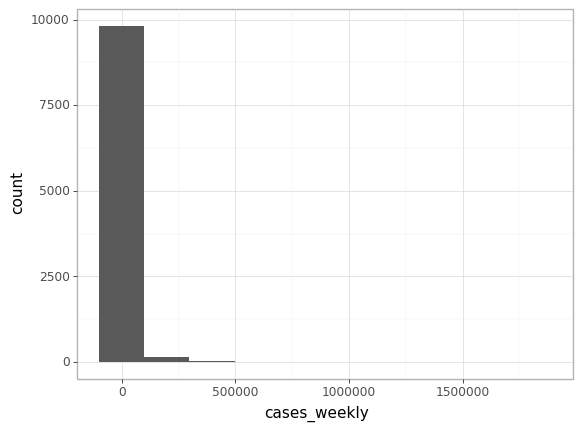

<ggplot: (8772227240726)>

In [14]:
(ggplot(df) 
 + geom_histogram(aes(x = 'cases_weekly'), bins=10)
 + theme_light())

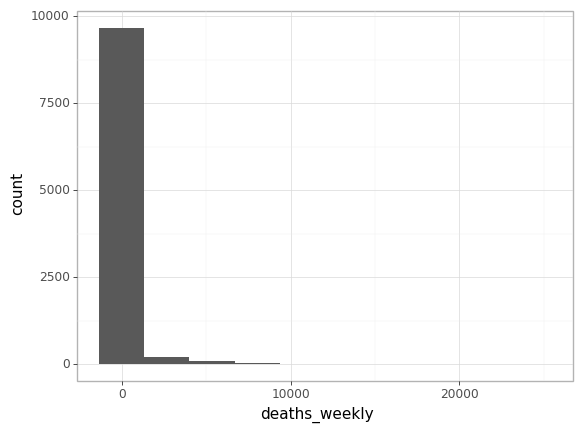

<ggplot: (8772228753396)>

In [15]:
(ggplot(df) 
 + geom_histogram(aes(x = 'deaths_weekly'), bins=10)
 + theme_light())


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def plotter(metric):
    minMax = MinMaxScaler()
    minMax.fit(df[[metric]])
    standard = StandardScaler()
    standard.fit(df[[metric]])
    regular = (ggplot(df_top_countries[[metric]]) 
     + geom_density(aes(x = df_top_countries[[metric]]))
     + ggtitle('Before Scaler for ' + metric)  
     + theme_light())
    metricStandard = (ggplot(df_top_countries[[metric]]) 
     + geom_density(aes(x = standard.transform(df_top_countries[[metric]])))
     + ggtitle('After Standard Scaler for ' + metric)  
     + theme_light())      
    metricMinMax = (ggplot(df_top_countries[[metric]]) 
     + geom_density(aes(x = minMax.transform(df_top_countries[[metric]])))
     + ggtitle('After MinMax Scaler for ' + metric)  
     + theme_light())
    print(regular, metricStandard, metricMinMax)

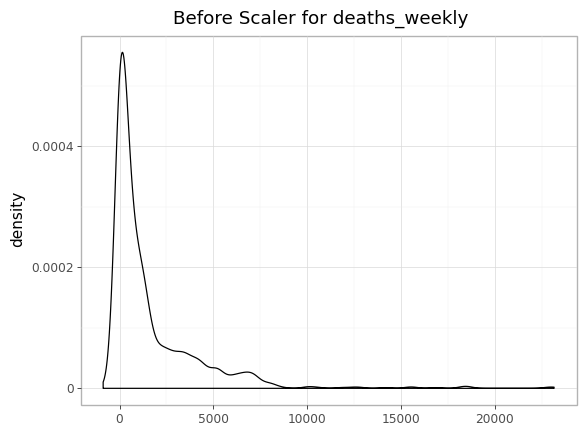

<ggplot: (8772228755598)> 

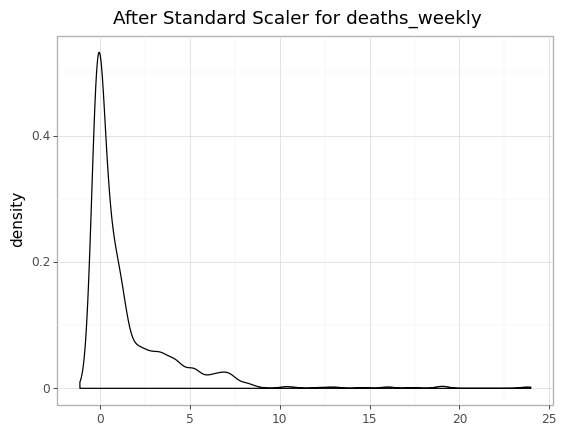

<ggplot: (8772228562502)> 

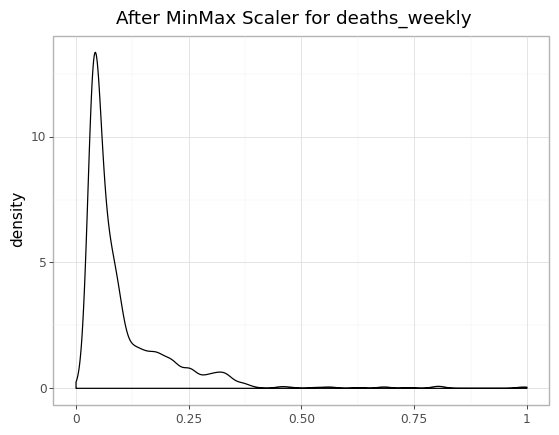

<ggplot: (8772228562381)>


In [17]:
plotter('deaths_weekly')

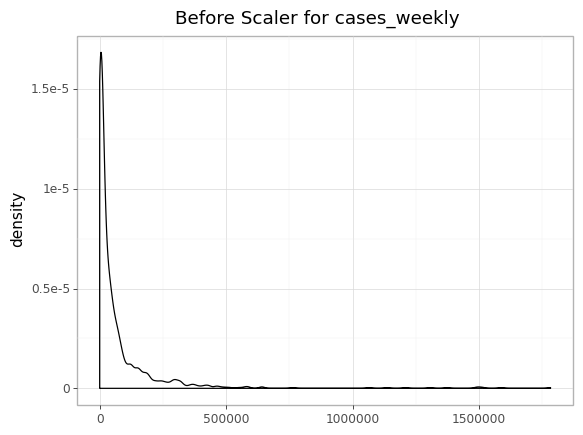

<ggplot: (8772228968747)> 

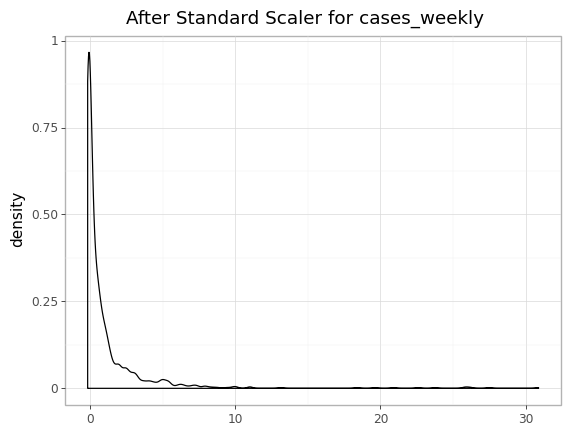

<ggplot: (8772228696034)> 

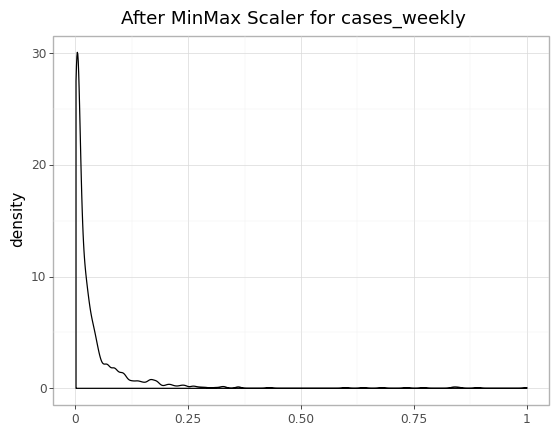

<ggplot: (8772228527526)>


In [18]:
plotter('cases_weekly')

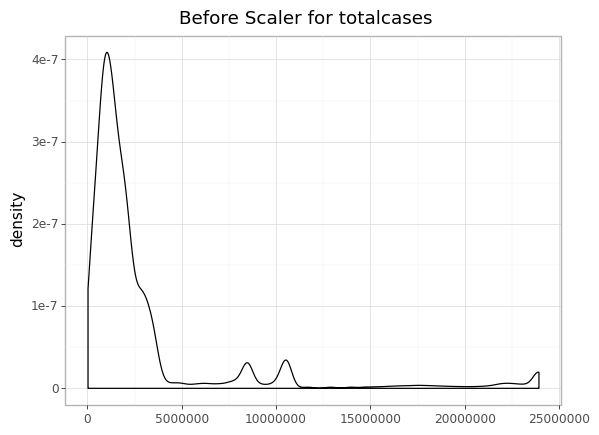

<ggplot: (8772230861418)> 

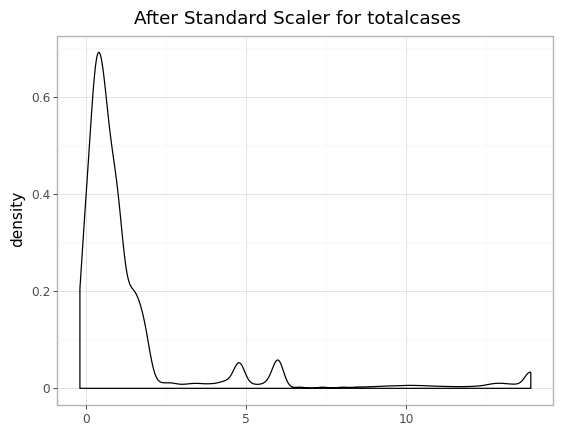

<ggplot: (8772228933943)> 

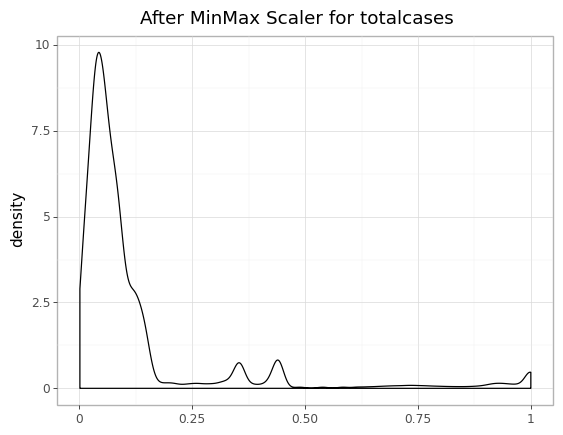

<ggplot: (8772231075265)>


In [19]:
plotter('totalcases')